<a href="https://colab.research.google.com/github/Robertkevin96/CS682/blob/main/Tennis_Trajectory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import tkinter as tk
import math
import sys
import pandas as pd
from google.colab import files
sys.setrecursionlimit(15000)


In [ ]:

#Constant values
gravity = 9.82#m/s^2
ballMass = 0.058 #.058kg
airDensity = (1.21) #kg/m^3
radius = (0.033)#m
pi = (3.14)
crossSection =(pi * (radius**2))

In [ ]:
#User input from textboxes needed. Calculating spin(rpm/60 * 2pi = (rads))
velocity = 100 #needs user input can not be hard coded
rpm = 3200 #user input. Needs changing
rps = rpm/60
spin_rads = rps * (2*pi)
v_spin = (spin_rads * radius)*60
k = velocity/v_spin
apv = crossSection * airDensity * velocity
theta = 4
deltaT = .1



In [ ]:
#sine and cosine functions

In [ ]:
#Lift Coefficient
Cl = (1/(2.022 + (0.981*k)))

In [ ]:
#Drag Coefficient
Cd = .508+(1/(22.503+(4.196*(k**2.5)))**.4)

In [ ]:
#Fd and FL
Fd = 1/2*(Cd * crossSection * airDensity *(velocity**2))
Fl = 1/2*(Cl * crossSection * airDensity *(velocity**2))

In [ ]:
print ("Drag Coefficient",Cd)
print ("Lift coefficient", Cl)
print ("Fd", Fd)
print ("Fl", Fl)
print ("cross section" , crossSection)
print ("air density", airDensity)
print ("velocity", velocity)

Drag Coefficient 0.795619321616599
Lift coefficient 0.4608451411558394
Fd 16.459560095245333
Fl 9.533841234579317
cross section 0.0034194600000000005
air density 1.21
velocity 100


In [ ]:
#Magnus force
magnus_force = 1/2*((Cl*crossSection*airDensity)*(velocity**2))

In [ ]:
print(magnus_force)

9.533841234579317


In [ ]:
# # RK-4 method python program
# def func_topspin_vx(vx,t):
    
#     return (apv/2*0.058)*((Cl*math.cos(theta)*math.sin(theta))-((Cd*(math.cos(theta)*math.cos(theta)))/2))

# def func_topspin_vy(vy,t):
    
#     return ((apv/2*0.058)*((-Cl*math.cos(theta)*math.sin(theta))-((Cd*math.sin(theta)*math.sin(theta))/2))- gravity)


# def func_backspin_vx(vx,t):
    
#     return (apv/2*0.058)*((-Cl*vx*math.sin(theta))-((Cd*(vx*vx))/2))

 # RK-4 method python program
# def func_backspin_vy(vy,t):
    
#     return ((apv/2*0.058)*((Cl*math.cos(theta)*vy)-((Cd*vy*vy)/2))- gravity)
def func_topspin_vx(vx,t):
    
    return (apv/2*0.058)*((-Cd*math.cos(theta))+(Cl*(velocity*math.sin(theta))))

def func_topspin_vy(vy,t):
    
    return ((apv/2*0.058)*((-Cd*(velocity*math.cos(theta))-(Cl*math.sin(theta))))- gravity)

def func_backspin_vx(vx,t):
    
    return (apv/2*0.058)*((-Cd*vx)-(Cl*(velocity*math.sin(theta))))

def func_backspin_vy(vy,t):
    
    return ((apv/2*0.058)*((-Cd*(velocity*math.cos(theta))-(Cl*vy)))- gravity)

# RK-4 method
def rk4(x0,y0,t,n,function_):
    
    # Calculating step size
    h = (t-x0)/n
    
    # //print('\n--------Top Spin--------')
    # //print('-------------------------')    
    # print('x0\ty0\tdvx')
    # print('-------------------------')
    for i in range(n):
        k1 = h * (function_(x0, y0))
        k2 = h * (function_((x0+h/2), (y0+k1/2)))
        k3 = h * (function_((x0+h/2), (y0+k2/2)))
        k4 = h * (function_((x0+h), (y0+k3)))
        k = (k1+2*k2+2*k3+k4)/6
        dv = y0 + k
        # print('%.4f\t%.4f\t%.4f'% (x0,y0,dvx) )
        # print('-------------------------')
        y0 = dv
        x0 = x0+h
    
    #print('\nAt t=%.4f, vx=%.4f' %(xn,dvx))
    return dv
    




In [ ]:
def plot(x0,y0,t):
  x,y=x0,y0
  data=pd.DataFrame(columns=['x','y','t','velocity','theta','rpm','fd','fl'])
  while y>0 or x!= 11.885 and y> 0.992:
    print (y)
    if spin==1:
      vx=rk4(x,y,t,5,func_topspin_vx)
      vy=rk4(x,y,t,5,func_topspin_vy)
      print(vx,vy)
    else:
      vx=rk4(x,y,t,5,func_backspin_vx)
      vy=rk4(x,y,t,5,func_backspin_vy)
      print(vx,vy)
   
    x=x+vx*t
    y=y+vy*t
    print(x,y)
    if(y>0):
      data=data.append({'x':x,'y':y,'t':t,'velocity':velocity,'theta':theta,'rpm':rpm,'fd':Fd,'fl':Fl},ignore_index=True)
    else:
      break
    if data.shape[0]==1:
      t=1
    else:
      t=t*2
  return data

In [ ]:
userx = float(input('x0 = '))
usery = float(input('y0 = '))
print('\n--------Type of Spin--------')
print('press 1 for Top Spin')
print('press 2 for Back Spin')
spin = input('Choice = ')
df=plot(userx,usery,0)

x0 = 0
y0 = 3

--------Type of Spin--------
press 1 for Top Spin
press 2 for Back Spin
Choice = 1
3.0
3.0 3.0
0.0 3.0
3.0
3.4137103480719357 -6.198760999366282
3.4137103480719357 -3.198760999366282


In [ ]:
df

,x,y,t,velocity,theta,rpm,fd,fl
0,0.0,3.0,0.0,100.0,4.0,3200.0,16.45956,9.533841


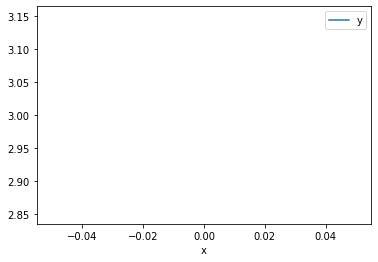

In [ ]:
df.plot('x','y')


In [ ]:
df.to_csv('trajectorydata.csv',encoding = 'utf-8-sig')